<a href="https://colab.research.google.com/github/geabd1/COSC251/blob/main/HW3_abdalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**QUESTION 1**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, zscore,pearsonr

Numerical Analysis:
                Mean  Median  Range  Standard Deviation
Store 1  292.500000   270.0    560          169.229538
Store 2  319.166667   320.0    560          186.910690


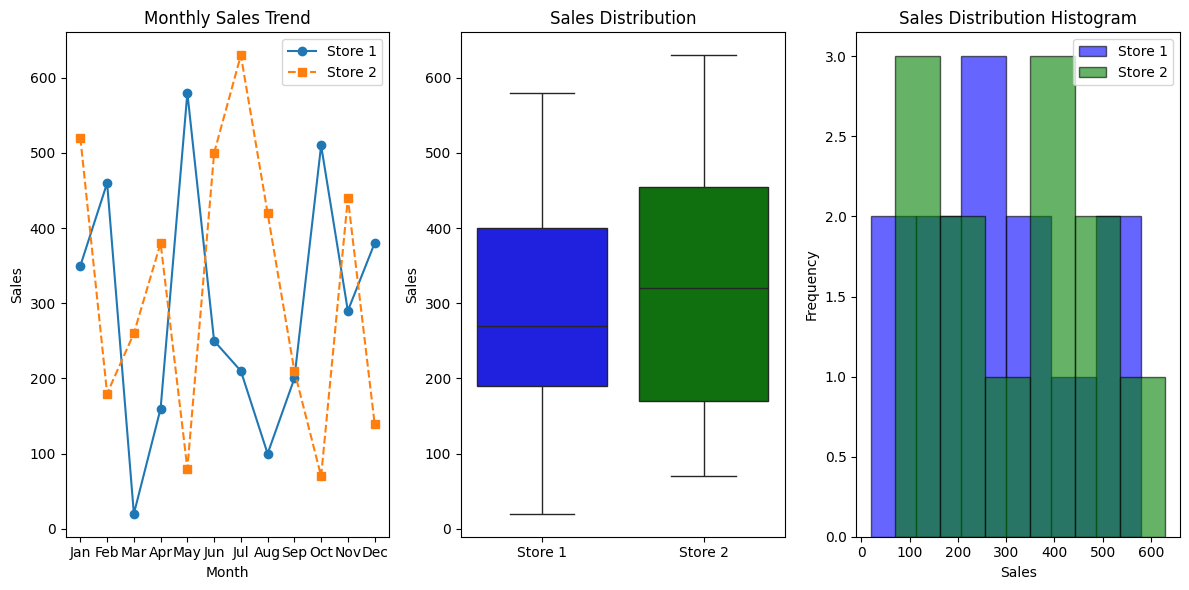

In [ ]:

store_1_sales = np.array([350, 460, 20, 160, 580, 250, 210, 100, 200, 510, 290, 380])
store_2_sales = np.array([520, 180, 260, 380, 80, 500, 630, 420, 210, 70, 440, 140])
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df = pd.DataFrame({'Month': months, 'Store 1': store_1_sales, 'Store 2': store_2_sales})

# Numerical Analysis
stats = {
    "Mean": [np.mean(store_1_sales), np.mean(store_2_sales)],
    "Median": [np.median(store_1_sales), np.median(store_2_sales)],
    "Range": [np.ptp(store_1_sales), np.ptp(store_2_sales)],  # Peak-to-peak (max-min)
    "Standard Deviation": [np.std(store_1_sales, ddof=1), np.std(store_2_sales, ddof=1)]
}
stats_df = pd.DataFrame(stats, index=["Store 1", "Store 2"])

print("Numerical Analysis:\n", stats_df)


plt.figure(figsize=(12, 6))

# Line Chart (Sales Over Time)
plt.subplot(1, 3, 1)
plt.plot(months, store_1_sales, marker='o', label='Store 1', linestyle='-')
plt.plot(months, store_2_sales, marker='s', label='Store 2', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.legend()

# Box Plot (Sales Distribution)
plt.subplot(1, 3, 2)
sns.boxplot(data=[store_1_sales, store_2_sales], palette=['blue', 'green'])
plt.xticks([0, 1], ['Store 1', 'Store 2'])
plt.ylabel('Sales')
plt.title('Sales Distribution')

# Histogram (Sales Frequency)
plt.subplot(1, 3, 3)
plt.hist(store_1_sales, bins=6, alpha=0.6, label='Store 1', color='blue', edgecolor='black')
plt.hist(store_2_sales, bins=6, alpha=0.6, label='Store 2', color='green', edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution Histogram')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
    from google.colab import drive

    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wine = pd.read_csv('/content/drive/My Drive/Colab Notebooks/winequality-red.csv')
iris = pd.read_csv('/content/drive/My Drive/Colab Notebooks/iris.csv')

house = pd.read_csv('/content/drive/My Drive/Colab Notebooks/house_price.csv')


Question 2

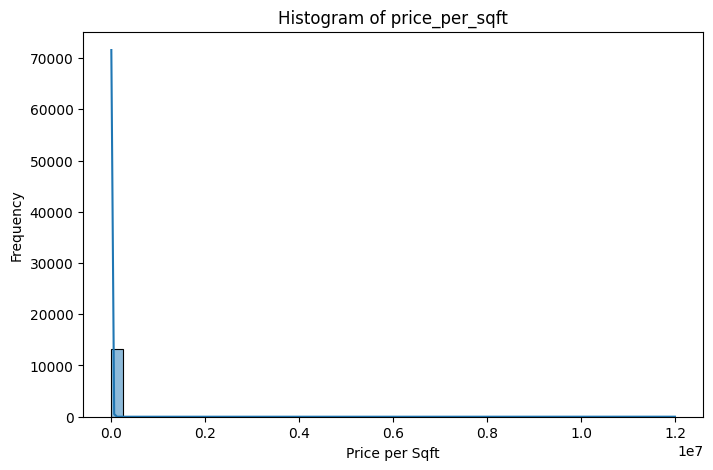

In [ ]:

price_per_sqft = house["price_per_sqft"]

# 1
plt.figure(figsize=(8, 5))
sns.histplot(price_per_sqft, bins=50, kde=True)
plt.title("Histogram of price_per_sqft")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 2
mean = np.mean(price_per_sqft)
std_dev = np.std(price_per_sqft, ddof=1)

lower_95, upper_95 = mean - 2*std_dev, mean + 2*std_dev
lower_997, upper_997 = mean - 3*std_dev, mean + 3*std_dev

print(f"95% range: {lower_95:.2f} to {upper_95:.2f}")
print(f"99.7% range: {lower_997:.2f} to {upper_997:.2f}")


95% range: -205533.98 to 221374.66
99.7% range: -312261.14 to 328101.82


In [ ]:
# 3
Q1 = price_per_sqft.quantile(0.25)
Q3 = price_per_sqft.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

house_iqr_filtered = house[(price_per_sqft >= lower_threshold) & (price_per_sqft <= upper_threshold)]

house_iqr_filtered.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
# 4
print(f"Size after IQR filtering: {house_iqr_filtered.shape[0]} rows")

# 5
house_std_filtered = house[(price_per_sqft >= lower_997) & (price_per_sqft <= upper_997)]
print(f"Size after 3 std deviation filtering: {house_std_filtered.shape[0]} rows")






Size after IQR filtering: 11935 rows
Size after 3 std deviation filtering: 13195 rows


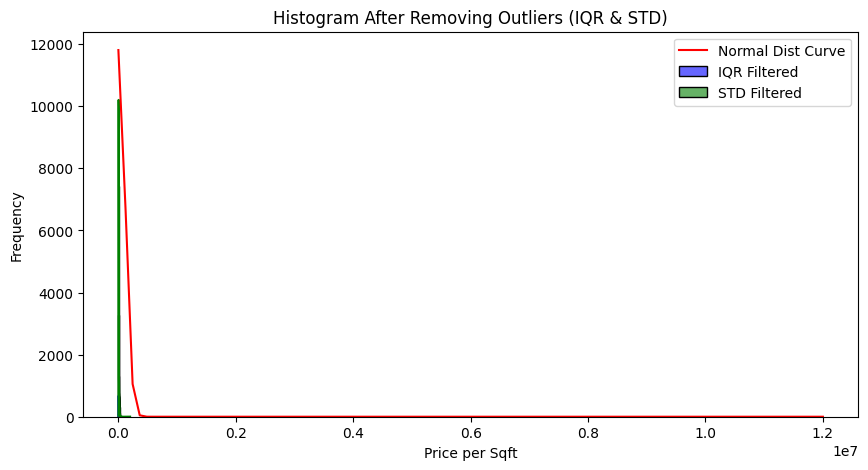

In [ ]:
# 6

plt.figure(figsize=(10, 5))

sns.histplot(house_iqr_filtered["price_per_sqft"], bins=50, kde=True, color="blue", label="IQR Filtered", alpha=0.6)

sns.histplot(house_std_filtered["price_per_sqft"], bins=50, kde=True, color="green", label="STD Filtered", alpha=0.6)

x_values = np.linspace(price_per_sqft.min(), price_per_sqft.max(), 100)
plt.plot(x_values, norm.pdf(x_values, mean, std_dev) * len(price_per_sqft) * (max(price_per_sqft)-min(price_per_sqft))/50,
         color='red', label="Normal Dist Curve")

plt.title("Histogram After Removing Outliers (IQR & STD)")
plt.xlabel("Price per Sqft")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
# 7

house_zscore_filtered = house[(np.abs(zscore(price_per_sqft)) < 3)]
print(f"Size after Z-score filter: {house_zscore_filtered.shape[0]} rows")


Size after Z-score filtering: 13195 rows


**QUESTION 3**

In [ ]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 1
missing_values = wine.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicate
duplicate_rows = wine.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Remove duplicates
wine = wine.drop_duplicates()
print(f"\nNew dataset size after removing duplicates: {wine.shape[0]} rows")


Missing Values:
 Series([], dtype: int64)

Number of duplicate rows: 240

New dataset size after removing duplicates: 1359 rows


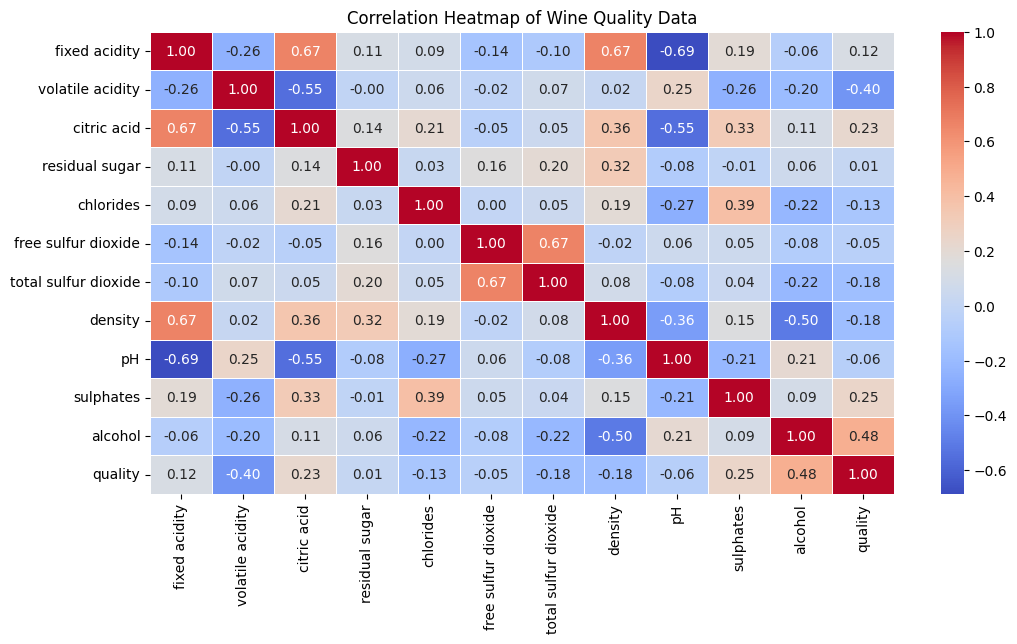

In [ ]:
# 2
correlation_matrix = wine.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Wine Quality Data")
plt.show()


<ipython-input-25-e68726effbf9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")


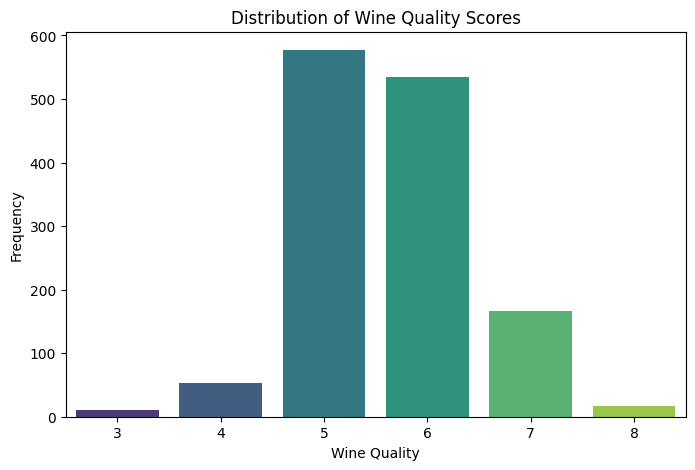

In [ ]:
# 3
quality_counts = wine["quality"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=quality_counts.index, y=quality_counts.values, palette="viridis")
plt.xlabel("Wine Quality")
plt.ylabel("Frequency")
plt.title("Distribution of Wine Quality Scores")
plt.show()


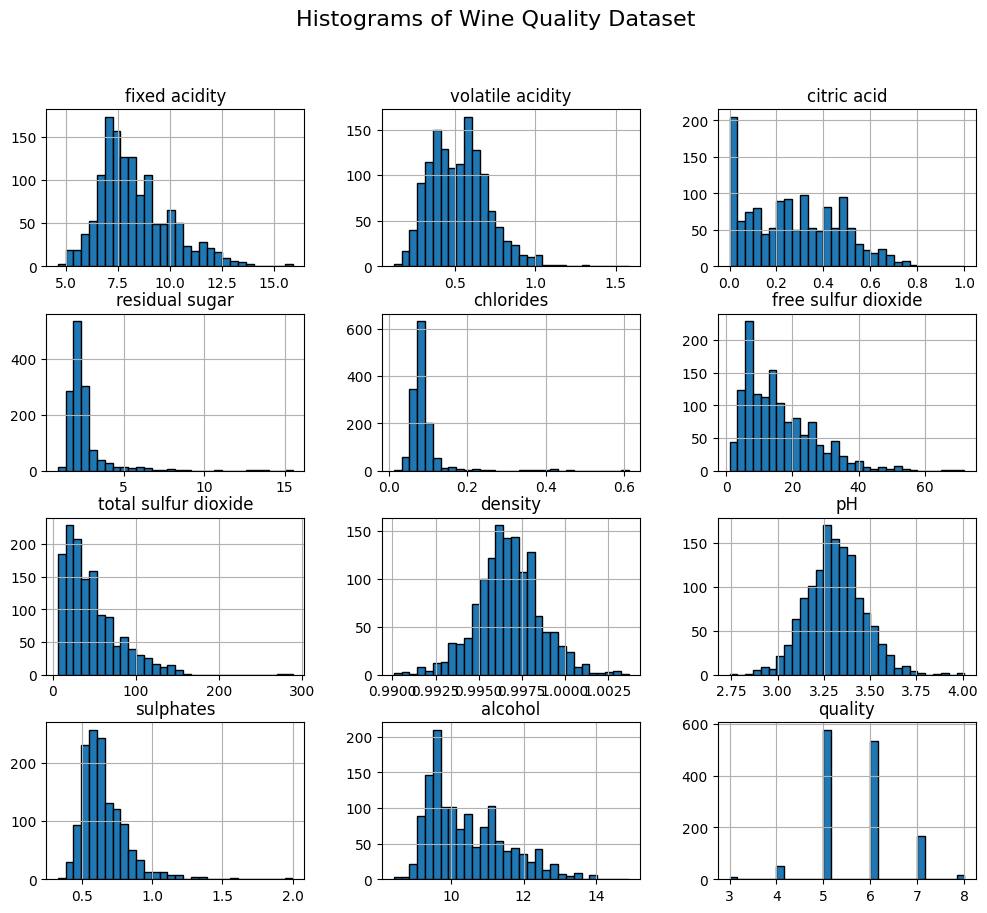

Outlier Counts Per Column:
 {'fixed acidity': np.int64(9), 'volatile acidity': np.int64(9), 'citric acid': np.int64(1), 'residual sugar': np.int64(28), 'chlorides': np.int64(27), 'free sulfur dioxide': np.int64(18), 'total sulfur dioxide': np.int64(12), 'density': np.int64(13), 'pH': np.int64(8), 'sulphates': np.int64(21), 'alcohol': np.int64(7), 'quality': np.int64(10)}


In [ ]:
# 4
wine.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Wine Quality Dataset", fontsize=16)
plt.show()

outliers = {}
for col in wine.columns:
    if wine[col].dtype in ["int64", "float64"]:
        mean = wine[col].mean()
        std_dev = wine[col].std()
        lower_bound, upper_bound = mean - 3 * std_dev, mean + 3 * std_dev
        outliers[col] = ((wine[col] < lower_bound) | (wine[col] > upper_bound)).sum()

print("Outlier Counts Per Column:\n", outliers)


<ipython-input-27-9e56e42ebd83>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="quality", y="alcohol", data=wine, palette="coolwarm")


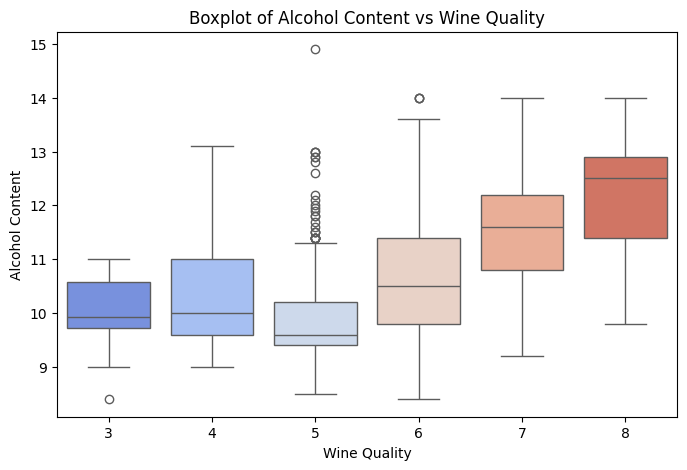

In [ ]:
# 5
plt.figure(figsize=(8, 5))
sns.boxplot(x="quality", y="alcohol", data=wine, palette="coolwarm")
plt.xlabel("Wine Quality")
plt.ylabel("Alcohol Content")
plt.title("Boxplot of Alcohol Content vs Wine Quality")
plt.show()


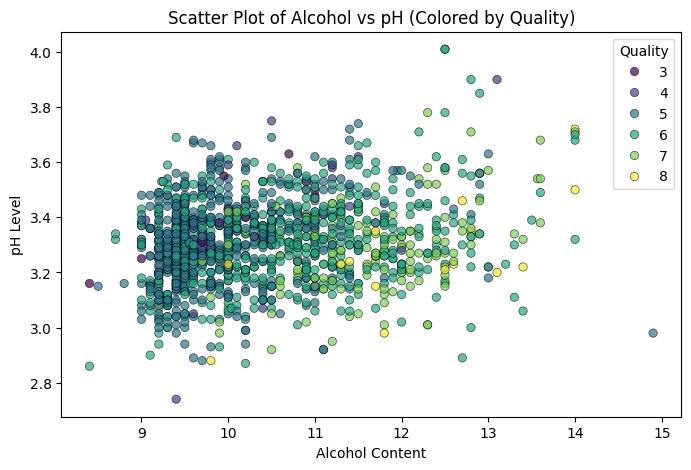

In [ ]:
# 6
plt.figure(figsize=(8, 5))
sns.scatterplot(x="alcohol", y="pH", hue="quality", data=wine, palette="viridis", edgecolor="black", alpha=0.7)
plt.xlabel("Alcohol Content")
plt.ylabel("pH Level")
plt.title("Scatter Plot of Alcohol vs pH (Colored by Quality)")
plt.legend(title="Quality", bbox_to_anchor=(1, 1))
plt.show()


**Question 4**

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 1
iris["petal_ratio"] = iris["petal_length"] / iris["petal_width"] # Changed 'petal.length' to 'petal_length' and 'petal.width' to 'petal_width'
iris["sepal_ratio"] = iris["sepal_length"] / iris["sepal_width"] # Changed 'sepal.length' to 'sepal_length' and 'sepal.width' to 'sepal_width'

aggregate_stats = iris.groupby("species")[["petal_ratio", "sepal_ratio"]].agg(["mean", "median", "min", "max", "std"])

aggregate_stats

petal_ratio                                     sepal_ratio  \
                  mean    median       min   max       std        mean   
species                                                                  
setosa        7.078000  7.000000  2.666667  15.0  3.123779    1.474578   
versicolor    3.242837  3.240385  2.666667   4.1  0.312456    2.160402   
virginica     2.780662  2.666667  2.125000   4.0  0.407367    2.230453   

                                                    
              median       min       max       std  
species                                             
setosa      1.467708  1.268293  1.956522  0.118693  
versicolor  2.161290  1.764706  2.818182  0.228658  
virginica   2.169540  1.823529  2.961538  0.246992

<ipython-input-36-2a0ebe4ce874>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="petal_ratio", data=iris, palette="Set2")
<ipython-input-36-2a0ebe4ce874>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal_ratio", data=iris, palette="Set2")


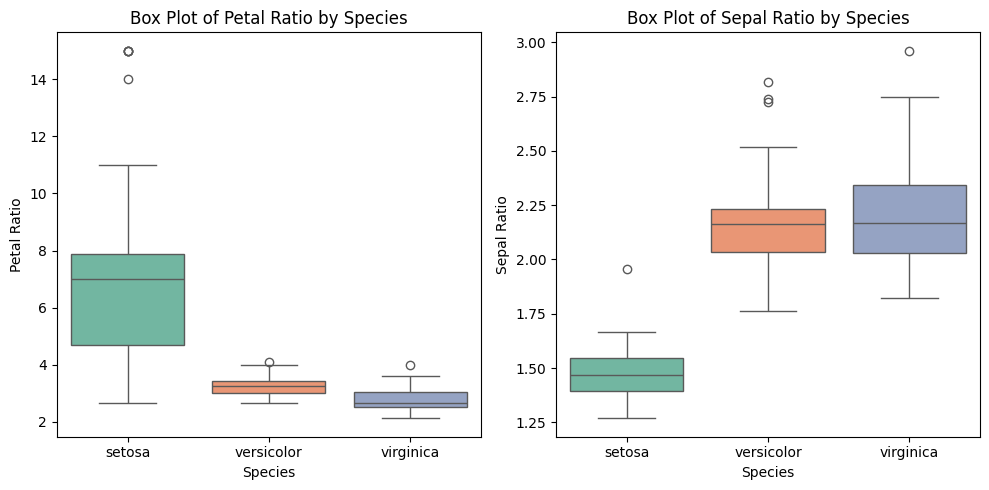

In [ ]:
# 2
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="species", y="petal_ratio", data=iris, palette="Set2")
plt.xlabel("Species")
plt.ylabel("Petal Ratio")
plt.title("Box Plot of Petal Ratio by Species")

plt.subplot(1, 2, 2)
sns.boxplot(x="species", y="sepal_ratio", data=iris, palette="Set2")
plt.xlabel("Species")
plt.ylabel("Sepal Ratio")
plt.title("Box Plot of Sepal Ratio by Species")

plt.tight_layout()
plt.show()


Pearson correlation coefficient between Sepal Length and Sepal Width: -0.11


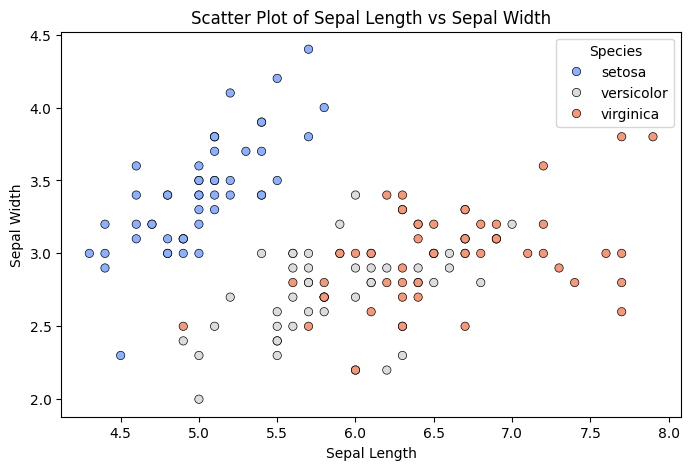

In [ ]:
# 3)
corr, _ = pearsonr(iris["sepal_length"], iris["sepal_width"])  # Changed 'sepal.length' to 'sepal_length' and 'sepal.width' to 'sepal_width'
print(f"Pearson correlation coefficient between Sepal Length and Sepal Width: {corr:.2f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=iris, palette="coolwarm", edgecolor="black")  # Changed 'sepal.length' to 'sepal_length' and 'sepal.width' to 'sepal_width'
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.legend(title="Species", bbox_to_anchor=(1, 1))
plt.show()

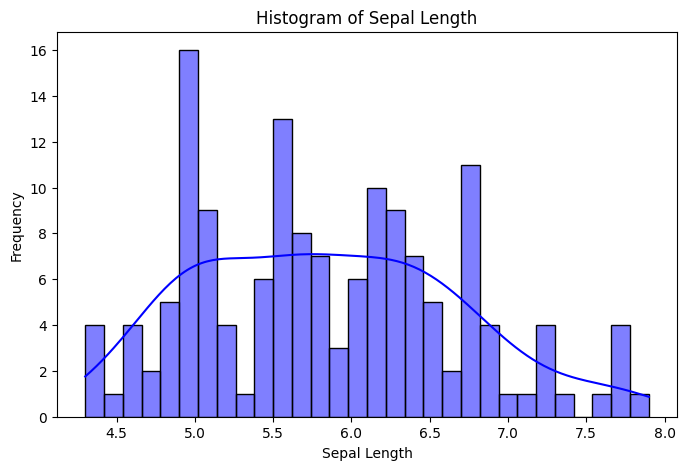

In [ ]:
# 4
plt.figure(figsize=(8, 5))
sns.histplot(iris["sepal_length"], bins=30, kde=True, color="blue") # Changed 'sepal.length' to 'sepal_length'
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sepal Length")
plt.show()

In [ ]:
# 5
mean_sepal_length = iris["sepal_length"].mean()  # Changed 'sepal.length' to 'sepal_length'
std_sepal_length = iris["sepal_length"].std()  # Changed 'sepal.length' to 'sepal_length'

low_68, high_68 = mean_sepal_length - std_sepal_length, mean_sepal_length + std_sepal_length
low_95, high_95 = mean_sepal_length - 2 * std_sepal_length, mean_sepal_length + 2 * std_sepal_length

print(f"68% range for Sepal Length: {low_68:.2f} to {high_68:.2f}")
print(f"95% range for Sepal Length: {low_95:.2f} to {high_95:.2f}")

68% range for Sepal Length: 5.02 to 6.67
95% range for Sepal Length: 4.19 to 7.50


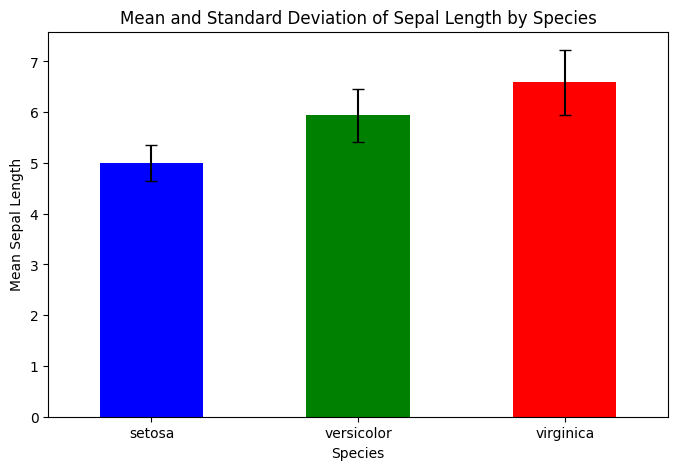

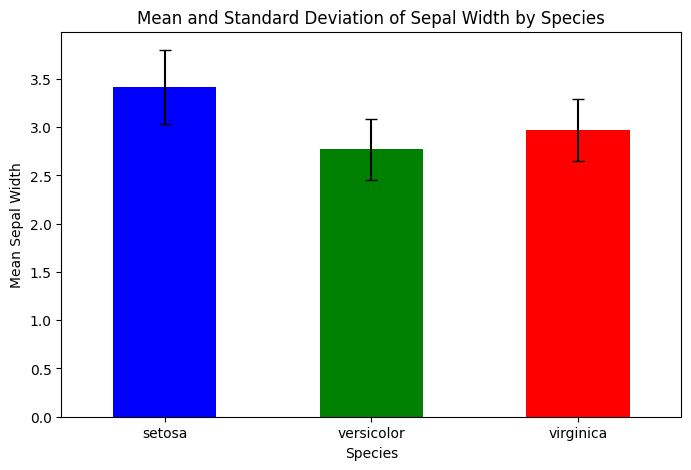

In [ ]:
# 6
sepal_stats = iris.groupby("species")[["sepal_length", "sepal_width"]].agg(["mean", "std"])

sepal_stats["sepal_length"].plot(kind="bar", y="mean", yerr="std", capsize=4, figsize=(8, 5), color=["blue", "green", "red"], legend=False) # Changed 'sepal.length' to 'sepal_length'
plt.title("Mean and Standard Deviation of Sepal Length by Species")
plt.xlabel("Species")
plt.ylabel("Mean Sepal Length")
plt.xticks(rotation=0)
plt.show()

sepal_stats["sepal_width"].plot(kind="bar", y="mean", yerr="std", capsize=4, figsize=(8, 5), color=["blue", "green", "red"], legend=False) # Changed 'sepal.width' to 'sepal_width'
plt.title("Mean and Standard Deviation of Sepal Width by Species")
plt.xlabel("Species")
plt.ylabel("Mean Sepal Width")
plt.xticks(rotation=0)
plt.show()